# Inference for numerical data

## North Carolina births

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

## Exploratory analysis

Load the `nc` data set into our notebook.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, run this command instead.
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

nc = pd.read_csv('https://www.openintro.org/stat/data/nc.csv')

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

<div class = 'exercise'>
<h4>Exercise 1</h4>
What are the cases in this data set? How many cases are there in our sample?
</div>

In [2]:
nc.shape

(1000, 13)

The nc has 1000 cases.

As a first step in the analysis, we should consider summaries of the data. This can be done using the `describe()` and `info()`:

In [3]:
nc.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [4]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


As you review the variable summaries, consider which variables are categorical and which are numerical. For numerical variables, are there outliers? If you aren't sure or want to take a closer look at the data, make a graph.

Consider the possible relationship between a mother's smoking habit and the weight of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

<div class = 'exercise'>
<h4>Exercise 2</h4>
    Make a side-by-side boxplot of <code>habit</code> and <code>weight</code>. What does the plot highlight about the relationship between these two variables?
</div>

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

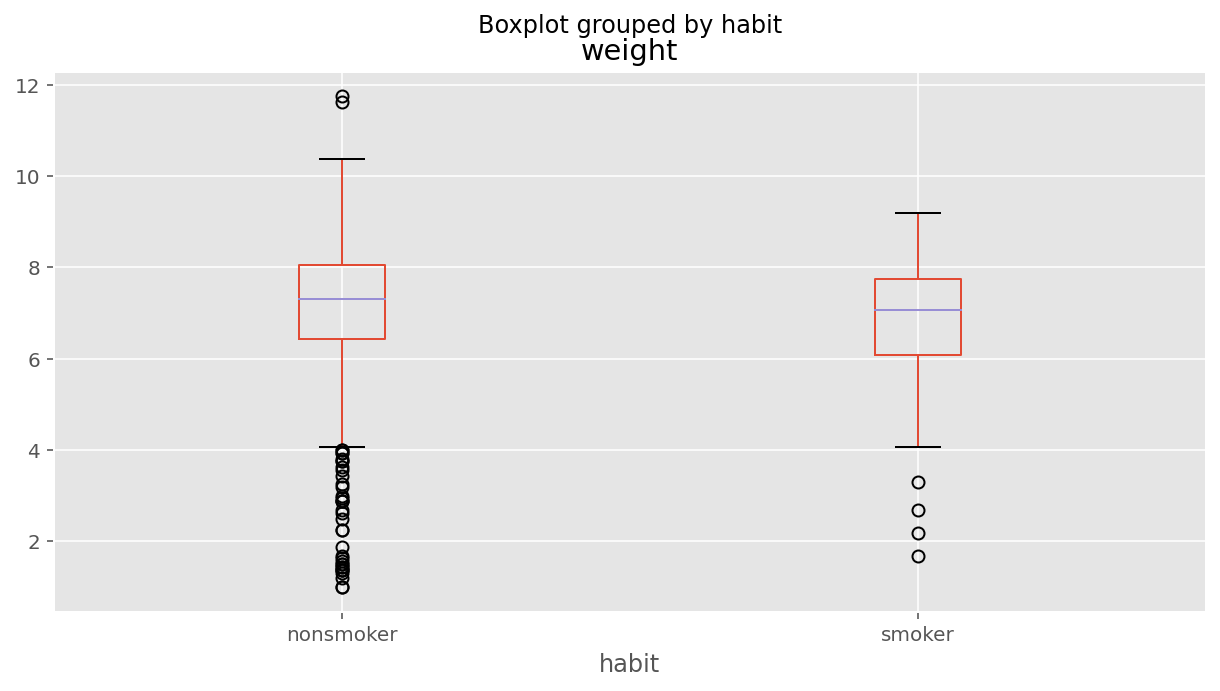

In [6]:
nc.boxplot(column=['weight'], by='habit')
plt.show()

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following function to split the `weight` variable into the `habit` groups, then take the mean of each using `mean()`.

In [7]:
nc.groupby(['habit'])['weight'].mean()

habit
nonsmoker    7.144273
smoker       6.828730
Name: weight, dtype: float64

There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test .

## Inference

<div class = "exercise">
<h4>Exercise 3</h4>
Check if the conditions necessary for inference are satisfied. Note that you will need to obtain sample sizes to check the conditions. You can compute the group size using the same <code>groupby</code> command above but replacing <code>mean</code> with <code>size</code>.
</div>

In [8]:
nc.groupby(['habit'])['weight'].size()

habit
nonsmoker    873
smoker       126
Name: weight, dtype: int64

<div class = "exercise">
<h4>Exercise 4</h4>
Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.
</div>

- H0: the average weights of babies born to smoking and non-smoking mothers are same.

- HA: the average weights of babies born to smoking and non-smoking mothers are different.

We will now conduct hypothesis tests for testing if the average weights of babies born to smoking and non-smoking mothers are different. For this task, we can use [`statsmodels`](https://www.statsmodels.org/stable/index.html), a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [9]:
import statsmodels.stats.weightstats as st

nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

dsw1 = st.DescrStatsW(nc_weightANDsmoker)
dsw2 = st.DescrStatsW(nc_weightANDnonsmoker)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_smoker = dsw1.nobs
n_nonsmoker = dsw2.nobs
mean_smoker = dsw1.mean
mean_nonsmoker = dsw2.mean
sd_smoker = dsw1.std
sd_nonsmoker = dsw2.std
print(f'n_smoker = {n_smoker}')
print(f'mean_smoker = {mean_smoker}')
print(f'sd_smoker = {sd_smoker}')
print()
print(f'n_nonsmoker = {n_nonsmoker}')
print(f'mean_nonsmoker = {mean_nonsmoker}')
print(f'sd_nonsmoker = {sd_nonsmoker}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_smoker = 126.0
mean_smoker = 6.828730158730159
sd_smoker = 1.380668106117173

n_nonsmoker = 873.0
mean_nonsmoker = 7.144272623138601
sd_nonsmoker = 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: Z = -2.3590109449334946
p-value = 0.018323715325166526
reject null hypothesis


<div class = 'exercise'>
<h4>Exercise 5</h4>
Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.</div>

95% 

point estimate +/- 1.96 * SE

In [10]:
non_conf_intv = dsw2.zconfint_mean(alpha=0.05, alternative='two-sided')

print('non-smoking confidence interval is (%.4f, %.4f)' %(non_conf_intv[0], non_conf_intv[1]))

non-smoking confidence interval is (7.0435, 7.2450)


In [11]:
s_conf_intv = dsw1.zconfint_mean(alpha=0.05, alternative='two-sided')

print('smoking confidence interval is (%.4f, %.4f)' %(s_conf_intv[0], s_conf_intv[1]))

smoking confidence interval is (6.5867, 7.0708)


---
## On Your Own

<ol>
    <li>Calculate a 95% confidence interval for the average length of pregnancies (<code>weeks</code>) and interpret it in context. Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the <code>x</code> variable from the function.</li><br>
    <li>Calculate a new confidence interval for the same parameter at the 90% confidence level.</li><br>
    <li>Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.</li><br>
    <li>Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.</li><br>
    <li>Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question with Python, report the statistical results, and also provide an explanation in plain language.</li>
</ol>

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com

#### 1. Calculate a 95% confidence interval for the average length of pregnancies (weeks) and interpret it in context. Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the x variable from the function.

In [12]:
# get the sub data set without nan value
nc_weeks = nc['weeks'].dropna()

In [13]:
nc_weeks.shape

(998,)

In [14]:
ds_weeks = st.DescrStatsW(nc_weeks)

weeks_conf_intv = ds_weeks.zconfint_mean(alpha=0.05, alternative='two-sided')

print('α is 0.95 and weeks confidence interval is (%.4f, %.4f)' %(weeks_conf_intv[0], weeks_conf_intv[1]))

α is 0.95 and weeks confidence interval is (38.1528, 38.5165)


#### 2. Calculate a new confidence interval for the same parameter at the 90% confidence level.

In [15]:
weeks_conf_intv_90 = ds_weeks.zconfint_mean(alpha=0.1, alternative='two-sided')

print('α is 0.9 and weeks confidence interval is (%.4f, %.4f)' %(weeks_conf_intv_90[0], weeks_conf_intv_90[1]))

α is 0.9 and weeks confidence interval is (38.1820, 38.4873)


#### 3. Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- H0: the average weight gained by younger mothers and the average weight gained by mature mothers are same.

- HA: the average weight gained by younger mothers and the average weight gained by mature mothers are different.

We will now conduct hypothesis tests for testing if the average weight gained by younger mothers and the average weight gained by mature mothers are different.

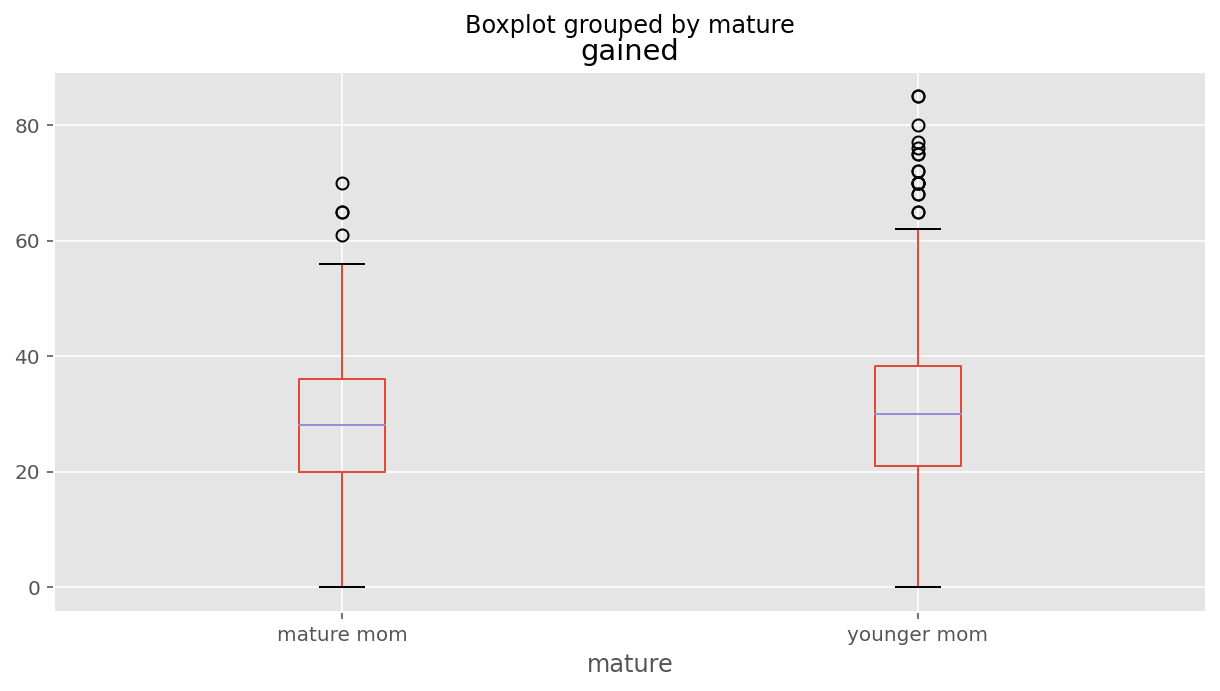

In [16]:
nc.boxplot(column=['gained'], by='mature')
plt.show()

In [17]:
nc_gained_mature_mom = nc[nc['mature'] == 'mature mom']['gained'].dropna()
nc_gained_younger_mom = nc[nc['mature'] == 'younger mom']['gained'].dropna()

ds_younger_w1 = st.DescrStatsW(nc_gained_younger_mom)
ds_mature_w2 = st.DescrStatsW(nc_gained_mature_mom)
cm = st.CompareMeans(ds_younger_w1, ds_mature_w2)

# calculate number of observations, mean and standard deviation for each group
num_younger = ds_younger_w1.nobs
num_mature = ds_mature_w2.nobs

mean_younger = ds_younger_w1.mean
mean_mature = ds_mature_w2.mean

sd_younger = ds_younger_w1.std
sd_mature = ds_mature_w2.std

print(f'num_younger = {num_younger}')
print(f'mean_younger = {mean_younger}')
print(f'sd_younger = {sd_younger}')
print()
print(f'num_mature = {num_mature}')
print(f'mean_mature = {mean_mature}')
print(f'sd_mature = {sd_mature}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

num_younger = 844.0
mean_younger = 30.56042654028436
sd_younger = 14.33840822856442

num_mature = 129.0
mean_mature = 28.790697674418606
sd_mature = 13.430079867583979

Standard error = 1.2856891093446254
Test statistic: Z = 1.376482738325338
p-value = 0.16867222789392544
accept null hypothesis


#### 4.Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.

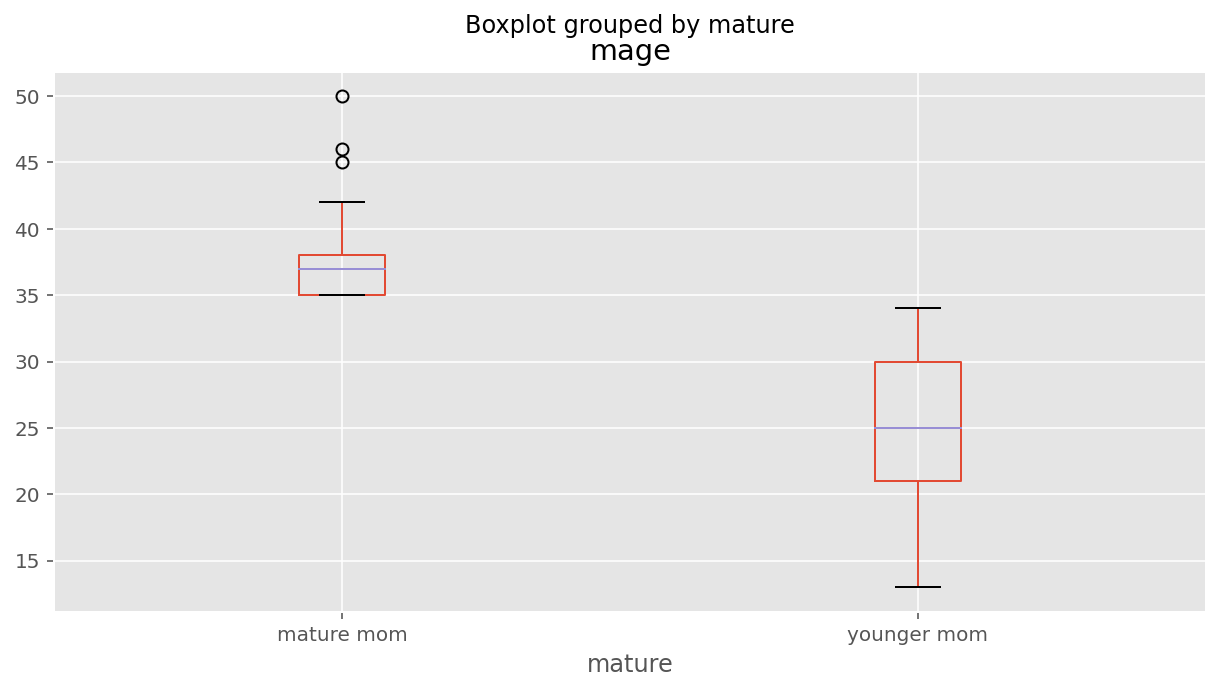

In [18]:
nc.boxplot(column=['mage'], by='mature')
plt.show()

In [19]:
nc_age_mature_mom = nc[nc['mature'] == 'mature mom']['mage'].dropna()
nc_age_younger_mom = nc[nc['mature'] == 'younger mom']['mage'].dropna()

In [20]:
nc_age_younger_mom.max()

34

In [21]:
nc_age_mature_mom.min()

35

I choose the maximum of younger group and minimum value of mature group.

The cutoff point is 34 years.

#### 5.Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question with Python, report the statistical results, and also provide an explanation in plain language.

I chose the gender and weight to analyze.

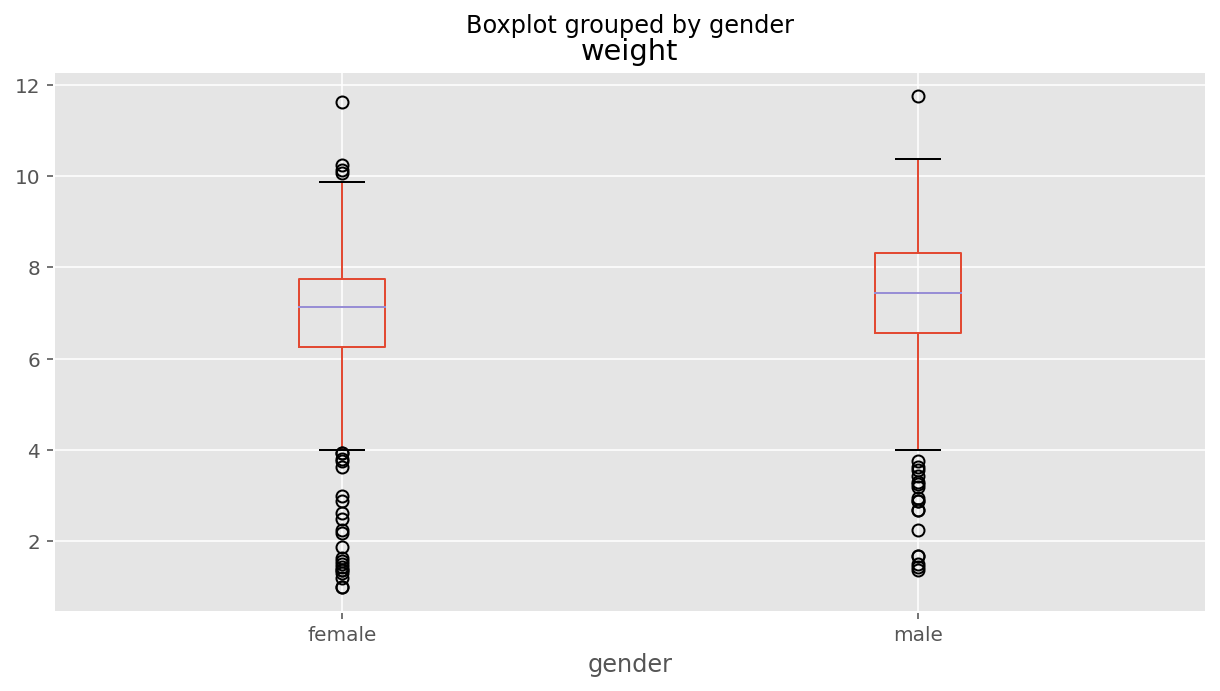

In [22]:
nc.boxplot(column=['weight'], by='gender')
plt.show()

In [23]:
nc.groupby(['gender'])['weight'].mean()

gender
female    6.902883
male      7.301509
Name: weight, dtype: float64

In [24]:
nc.groupby(['gender'])['weight'].size()

gender
female    503
male      497
Name: weight, dtype: int64

Next, I'm going to do a a hypothesis test evaluating whether the average weight of male baby is different than the average weight of female baby.

- α = 0.05

- H0: the average weight of male baby and the average weight of female baby are same.

- HA: the average weight of male baby and the average weight of female baby are different.

In [25]:
nc_weight_male = nc[nc['gender'] == 'male']['weight'].dropna()
nc_weight_female = nc[nc['gender'] == 'female']['weight'].dropna()

ds_weight_male1 = st.DescrStatsW(nc_weight_male)
ds_weight_female2 = st.DescrStatsW(nc_weight_female)

cm = st.CompareMeans(ds_weight_male1, ds_weight_female2)

# calculate number of observations, mean and standard deviation for each group
num_male = ds_weight_male1.nobs
num_female = ds_weight_female2.nobs

mean_male = ds_weight_male1.mean
mean_female = ds_weight_female2.mean

sd_male = ds_weight_male1.std
sd_female = ds_weight_female2.std

print(f'num_male = {num_male}')
print(f'mean_male = {mean_male}')
print(f'sd_male = {sd_male}')
print()
print(f'num_female = {num_female}')
print(f'mean_female = {mean_female}')
print(f'sd_female = {sd_female}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = %.8f' %p_value)

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')
    

num_male = 497.0
mean_male = 7.3015090543259555
sd_male = 1.5153189384847316

num_female = 503.0
mean_female = 6.902882703777335
sd_female = 1.4744012634439698

Standard error = 0.09465629879806796
Test statistic: Z = 4.2113029519463625
p-value = 0.00002539
reject null hypothesis


Because the p-value is 0.00002539 that is less than the 0.05, I have sufficient evidence to reject H0 hypothesis, and I failed to reject Ha hypothesis.

It means that the average weight of male baby and the average weight of female baby are different.

###### Calculate new confidence intervals of male baby and female baby at the 95% confidence level.¶

In [26]:
male_baby_w_conf_intv = ds_weight_male1.zconfint_mean(alpha=0.01, alternative='two-sided')

print('α is 0.95 and weight of male baby confidence interval is (%.4f, %.4f)' %(male_baby_w_conf_intv[0], male_baby_w_conf_intv[1]))

α is 0.95 and weight of male baby confidence interval is (7.1263, 7.4768)


In [27]:
female_baby_w_conf_intv = ds_weight_female2.zconfint_mean(alpha=0.01, alternative='two-sided')

print('α is 0.95 and weight of female baby confidence interval is (%.4f, %.4f)' %(female_baby_w_conf_intv[0], female_baby_w_conf_intv[1]))

α is 0.95 and weight of female baby confidence interval is (6.7334, 7.0724)
